In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("data/iris.csv", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

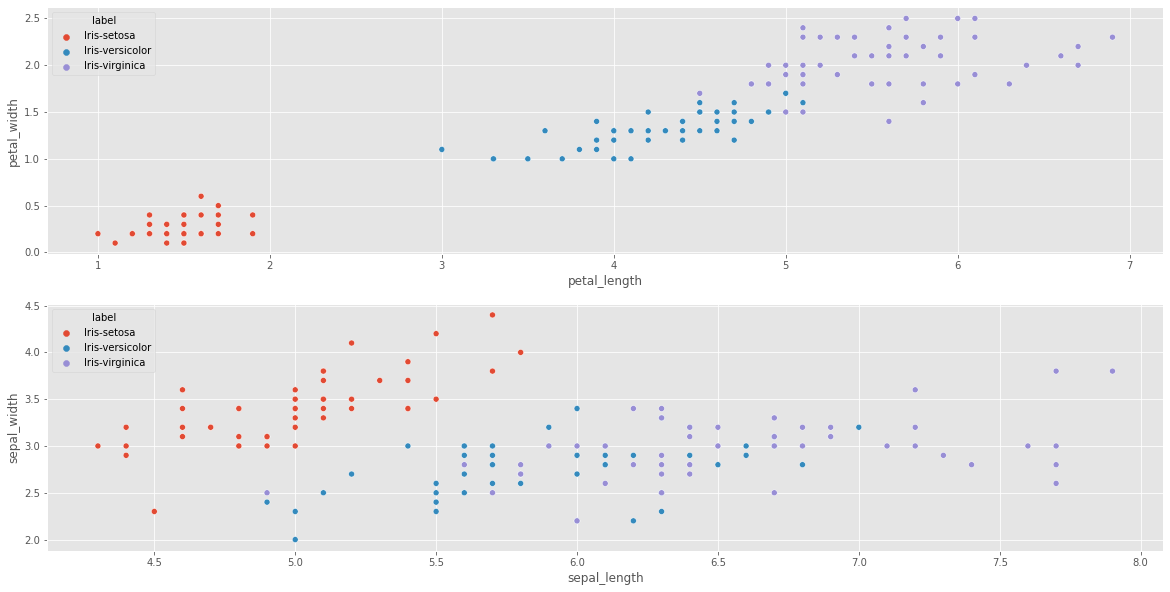

In [4]:
plt.subplot(2, 1, 1)
sns.scatterplot(data=data, x="petal_length", y="petal_width", hue="label")
plt.subplot(2, 1, 2)
sns.scatterplot(data=data, x="sepal_length", y="sepal_width", hue="label")

#### From the above graph we can conclude that information about the petals can help us classify iris-setosa from the order 2 classes

We will hence create a logistic regression classifier using these variables. We will also convert the labels of the other two classes to non_setosa so that our data now as only two classes.

,label,encoded_labels
0,Iris-setosa,0
50,non_setosa,1


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

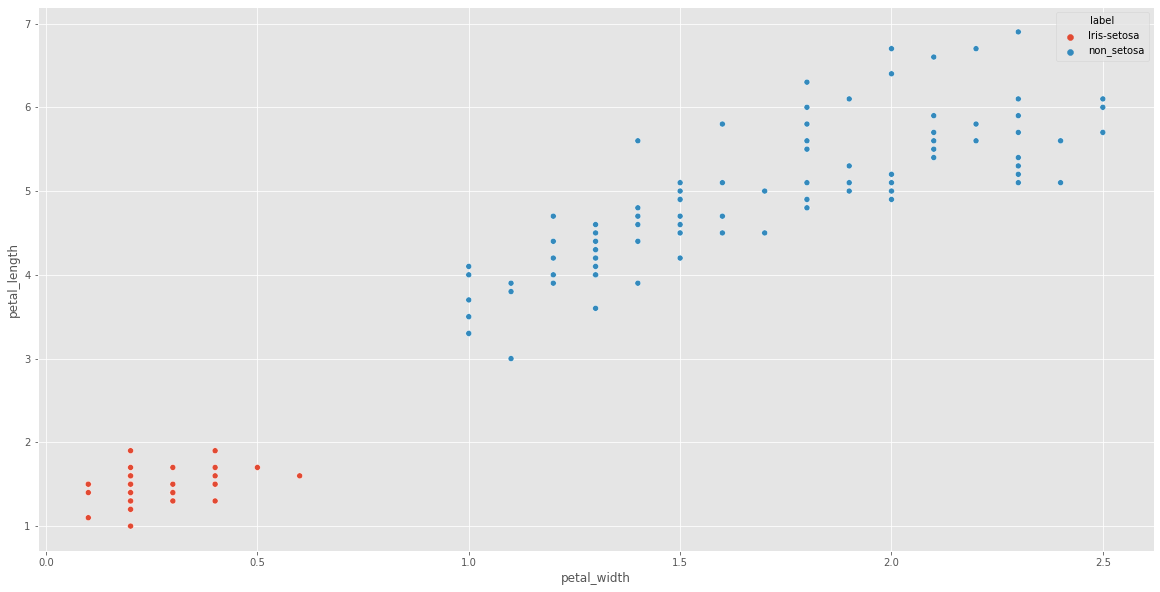

In [10]:
# Simply replace the string of the other two classes with `non_sentosa`
# We pass the `label` column to label encoder which maps the string labels to integer

data_subset = data[["petal_width", "petal_length", "label"]].copy()
data_subset = data_subset.replace("Iris-virginica", "non_setosa").replace("Iris-versicolor", "non_setosa")

encoder = LabelEncoder()
new_labels = encoder.fit_transform(data_subset.label.values)
data_subset["encoded_labels"] = new_labels
display(data_subset[["label", "encoded_labels"]].drop_duplicates())
sns.scatterplot(data=data_subset, x="petal_width", y="petal_length", hue="label")

### Iris-sentosa is mapped to the label <span style="color:yellow">0</span> and non_setosa is mapped to <span style="color:yellow">1</span>

In [15]:
class BiVariableLogisticRegression:

    def __init__(self, w1=None, w2=None, b=None, alpha=0.001):
        self.alpha = alpha
        self.w1 = w1
        self.w2 = w2
        self.b = b

        self.w1_tracker = []
        self.w2_tracker = []
        self.b_tracker = []
        self.cost_tracker = []
        self.test_metrics = {}

        if self.w1 is None:
            self.w1 = random.random()
        if self.w2 is None:
            self.w2 = random.random()
        if self.b is None:
            self.b = random.random()

    @staticmethod
    def get_sigmoid_value(eq_value):
        return 1 / (1 + np.exp(-eq_value))

    def get_eq_value(self, features_):
        return features_.dot([self.w1, self.w2]) + self.b

    def get_performance(self, x, y):
        calculated_label = self.get_sigmoid_value(self.get_eq_value(x))
        individual_cost = -(y * np.log(calculated_label) +
                            (1 - y) * np.log(1 - calculated_label))
        cost = sum(individual_cost) / len(individual_cost)
        return calculated_label, cost

    def train(self, x, y):
        while True:
            self.w1_tracker.append(self.w1)
            self.w2_tracker.append(self.w2)
            self.b_tracker.append(self.b)

            calculated_labels, average_cost = self.get_performance(x,y)
            self.cost_tracker.append(average_cost)

            a_y = calculated_labels - y
            dw1 = x[:, 0].dot(a_y) / len(x)
            dw2 = x[:, 1].dot(a_y) / len(x)
            db = sum(a_y) / len(x)

            updated_w1 = self.w1 - self.alpha * dw1
            updated_w2 = self.w2 - self.alpha * dw2
            updated_b = self.b - self.alpha * db

            if math.isclose(self.w1, updated_w1, rel_tol=1e-05) and math.isclose(self.w2, updated_w2,
                                                                             rel_tol=1e-05) and math.isclose(self.b, updated_b,
                                                                                                             rel_tol=1e-05):
                break
            self.w1 = updated_w1
            self.w2 = updated_w2
            self.b = updated_b

    def test(self, x, y):
        prediction_probability, cost = self.get_performance(x, y)
        self.test_metrics = {
            "prediction_probabilities": prediction_probability,
            "cost": prediction_probability,
            "predictions": np.round(prediction_probability).astype(int),
        }
        return self.test_metrics["predictions"]

In [28]:
features = data_subset[["petal_width","petal_length"]].values
labels = data_subset["encoded_labels"].values
x_train, x_test, y_train, y_test = train_test_split(features, labels)

In [29]:
custom_model = BiVariableLogisticRegression()
custom_model.train(x_train, y_train)
custom_model.w1, custom_model.w2, custom_model.b

(1.8732804495394733, 0.893760623750693, -3.422806375911408)

In [32]:
print(classification_report(y_test,custom_model.test(x_test, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        28

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [34]:
len(custom_model.w1_tracker),len(custom_model.w2_tracker),len(custom_model.cost_tracker)

(53828, 53828, 53828)

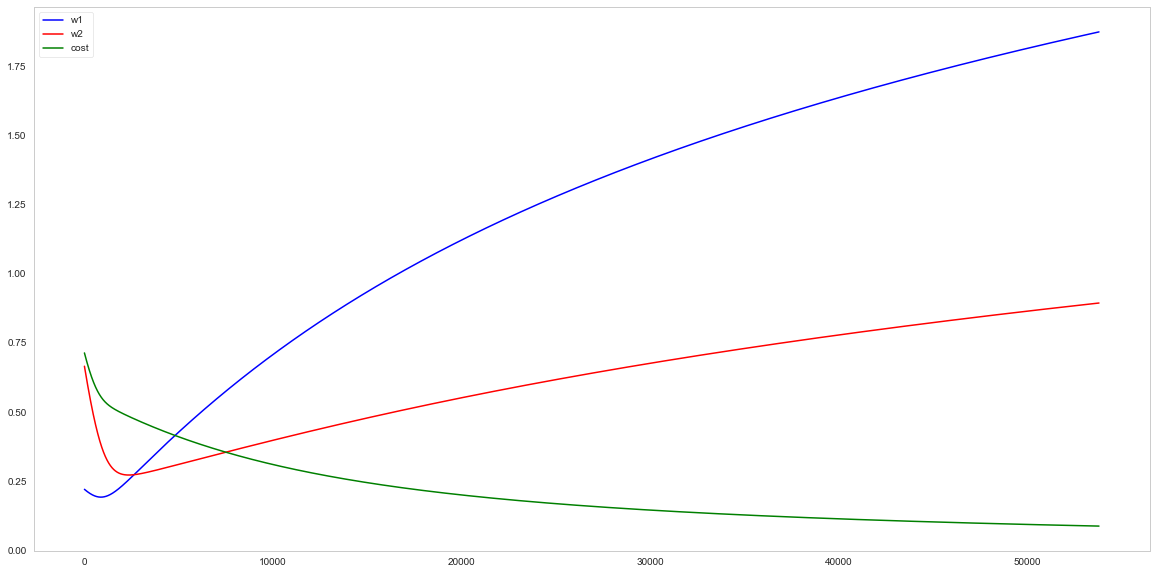

In [58]:
plt.plot(custom_model.w1_tracker, color="blue")
plt.plot(custom_model.w2_tracker, color="red")
plt.plot(custom_model.cost_tracker, color="green")
plt.legend(["w1","w2","cost"])
plt.show()